# Getting started for the AML 2023/2024 Egocentric Vision Project

<a href="https://colab.research.google.com/github/EgovisionPolito/aml23-ego/blob/master/colab_runner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Downloading the code

In [ ]:
# Clone the public repository (or your repository)
!git clone https://github.com/EgovisionPolito/aml23-ego.git aml23-ego

Cloning into 'aml23-ego'...
remote: Enumerating objects: 61, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (8/8), done.
^C


In [1]:
# Installing missing dependencies
!pip install omegaconf coloredlogs wandb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 32.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 19.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.4/196.4 kB 27.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.1/254.1 kB 31.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 10.5 MB/s eta 0:00:00
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.9.3-py3-none-any.whl size=144554 sha256=e36ae6e392c68a70cafc0db7af3f68fbcf91b7264ef7f13d369dc49c195798df
  Stored in directory: /root/.cache/pip/wheels/12/93/dd/1f6a127edc45659556564c5730f6d4e300888f4bca2d4c5a88
Successfully built 

## EPIC-Kitchens-55 dataset

**READ carefully!**

To develop the project, you need to download the RGB frames for a subset of EPIC-Kitchens-55 (participants P08, P01 and P22) from [here](https://drive.google.com/drive/u/1/folders/1dJOtZ07WovP3YSCRAnU0E4gsfqDzpMVo).

You also need to the pretrained checkpoints for each domain from [here](https://politoit-my.sharepoint.com/:f:/g/personal/simone_peirone_polito_it/ErdsZhvmR65Lun5_5O0-l5sBTPjCCZZq2f700Tj_CNzjTQ?e=L1yflf).

Add the Google Drive directory containing the dataset to your Google Drive or upload the dataset on your Google Drive to access it from Google Colab.

**NOTE**: As the dataset is quite heavy, we stronly suggest you to implement and test all your code on one for the three dataset. Then, once you are sure everything works, repeat the experiments on the remaining two datasets.

In [1]:
# Mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%%bash

# As read and write operations from google drive are slow, we suggest to copy and unzip
# the dataset in a local directory on the Colab's machine.
mkdir -p ek_data/frames

# Copy the *.zip files of Epic-Kitchens
# TODO: replace with your path to the dataset
 cp /content/drive/MyDrive/ProjectDAAI/Epic_Kitchens_reduced/*.zip ./ek_data
# Unzip
for file in ./ek_data/*.zip; do
  echo $file
  unzip $file -d ek_data/frames/
  rm $file
done

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Copy files from the drive

In [3]:
%%bash
mkdir -p ./aml23-ego
cp -r /content/drive/MyDrive/ProjectDAAI/aml23-ego/ ./

In [ ]:
cp -r ./aml23-ego/* /content/drive/MyDrive/ProjectDAAI/aml23-ego/

## Features extraction

Use the appropriate loader fole from the /utils i.e. dense or uniform "loader" file.

In [ ]:
%%bash

# Replace the following path with the path of your codebase
cd aml23-ego

python save_feat.py name=D1_Uniform \
  config=configs/I3D_save_feat.yaml \
  dataset.shift=D1-D1 \
  dataset.RGB.data_path=../ek_data/frames

# If everything is working, you should expect an error message telling you to implement the '_get_val_indices' method in the dataset class.
# Once you have implemented it, you should run the script for the train and test split of the dataset to extract the features.

2024-01-18 21:06:52 LOG INFO Feature Extraction
2024-01-18 21:06:52 LOG INFO Running with parameters: 
  action: save
  name: D1_Uniform
  modality: ['RGB']
  total_batch: 128
  batch_size: 32
  gpus: None
  wandb_name: None
  resume_from: ./saved_models/I3D_SourceOnlyD1
  logname: save_D1-D1.log
  models_dir: saved_models/D1_Uniform/Jan18_21-06-40
  train:
    num_iter: 5000
    lr_steps: 3000
    eval_freq: 50
    num_clips: 1
    dense_sampling:
      RGB: True
    num_frames_per_clip:
      RGB: 16
  test:
    num_clips: 5
    dense_sampling:
      RGB: True
    num_frames_per_clip:
      RGB: 16
  dataset:
    annotations_path: train_val
    shift: D1-D1
    workers: 4
    stride: 2
    resolution: 224
    RGB:
      data_path: ../ek_data/frames
      tmpl: img_{:010d}.jpg
      features_name: test_feat_kinetics
    Event:
      rgb4e: 6
  models:
    RGB:
      model: I3D
      normalize: False
      kwargs:
      lr_steps: 3000
      lr: 0.01
      sgd_momentum: 0.9
      weight

View extracted features.

In [4]:
!pip install kmeans-pytorch

PCA and tSNE implemntation.

In [5]:
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

import pandas as pd
import numpy as np

import pickle

def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [6]:
# Extracting 'Features'
df = unpickle(f"/content/aml23-ego/saved_features/D1_Dense_D1_train.pkl")
features = df["features"]

# Combine the 5 features of each action into a single vector
X = np.vstack([np.concatenate([feat["features_RGB"][i] for i in range(5)]) for feat in features])
print(f"X shape: {X.shape}")

X shape: (1543, 5120)


PCA Cumulative Explained Variance ratio plot.

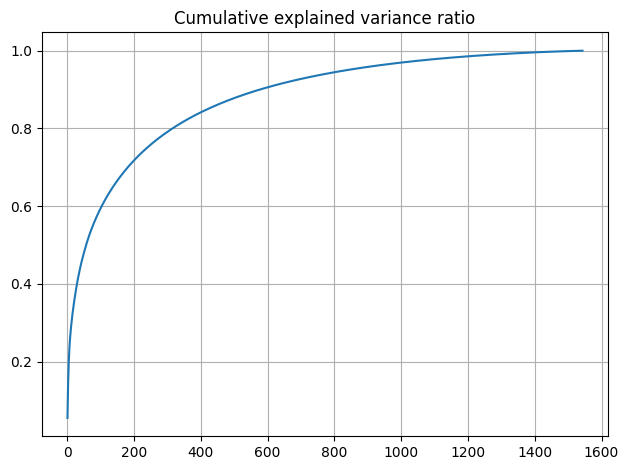

Number of mainteined components: 577


In [7]:
# Cumulative Variance Plot #
pca = PCA()
pca.fit(X)

explained_variance = np.cumsum(pca.explained_variance_ratio_)

fig, ax = plt.subplots()
ax.plot(np.arange(1, explained_variance.size+1), explained_variance)
ax.set_title("Cumulative explained variance ratio")
ax.grid(True)
fig.tight_layout()
plt.show()

# Dimentionality Reduction with PCA
pca = PCA(n_components = 0.9)
X_pca = pca.fit_transform(X)

print(f'Number of mainteined components: {X_pca.shape[1]}')

Plot for tSNE and PCA.

In [8]:
def plot_cluster(x,y,kmeans_pca,kmeans_tsne,true_labels,s_pca,s_tsne):
  #Funtion for plot generation with PCA and tSNE

    fig, ax = plt.subplots(2)
    sns.scatterplot(x=x[:,0],y=x[:,1],c=kmeans_pca.labels_,ax=ax[0])

    ax[0].set_title(f"PCA 2 components - silh: {s_pca:.2f}")
    ax[0].plot()
    ax[0].scatter(
    kmeans_pca.cluster_centers_[:, 0],
    kmeans_pca.cluster_centers_[:, 1],
    marker="x",
    s=169,
    linewidths=3,
    zorder=10,
    color='r'
    )

    sns.scatterplot(x=y[:,0],y=y[:,1],c=kmeans_tsne.labels_,ax=ax[1])

    ax[1].set_title(f"t-SNE 2 components - silh: {s_tsne:.2f}")
    ax[1].plot()
    ax[1].plot()
    ax[1].scatter(
    kmeans_tsne.cluster_centers_[:, 0],
    kmeans_tsne.cluster_centers_[:, 1],
    marker="x",
    s=169,
    linewidths=3,
    zorder=10,
    color='r'
    )
    print()
    return

Silhouette Score and Scatter Plot.

silhouette for kmeans_sklearn with PCA=2: 0.3378921151161194 
silhouette for kmeans_sklearn with tsne: 0.4037879407405853 



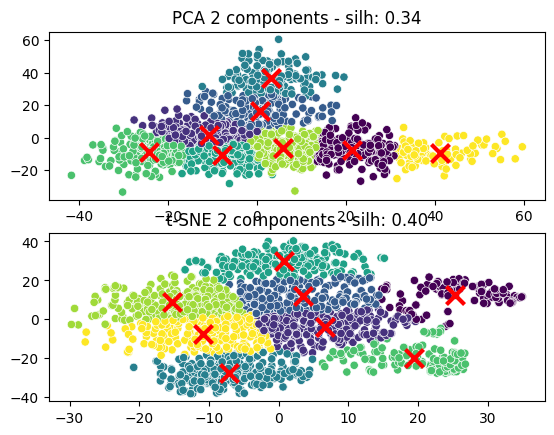

In [9]:
from sklearn.pipeline import make_pipeline
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import os
saved_feat_path="/content/aml23-ego/saved_features/D1_Dense_D1_train.pkl"
annotations_path="/content/aml23-ego/train_val/D1_test.pkl"
file=open(saved_feat_path,'rb')
feat=pickle.load(file)
annotations=pickle.load(open(annotations_path,'rb'))
true_labels=annotations['verb_class']
nouns=[n.split(' ')[-1] for n in annotations['narration']]
# PCA & PLOT POINTS
random_state=0
# with PCA
model=make_pipeline(StandardScaler(),PCA(2,random_state=random_state))
X_2feat=model.fit_transform(X)
# T-SNE & PLOT
model_tSNE=make_pipeline(StandardScaler(),TSNE())
tsne=TSNE()
X_tsne=model_tSNE.fit_transform(X)
# SET CLUSTER
num_clusters=8


kmeans_SL = KMeans(n_clusters=num_clusters, random_state=0,init="k-means++", n_init='auto').fit(X_2feat)
kmeans_tSNE = KMeans(n_clusters=num_clusters, random_state=0,init="k-means++", n_init='auto').fit(X_tsne)

s=silhouette_score(X_2feat,kmeans_SL.labels_)
s_tsne=silhouette_score(X_tsne,kmeans_tSNE.labels_)
print(f"silhouette for kmeans_sklearn with PCA=2: {s} ")
print(f"silhouette for kmeans_sklearn with tsne: {s_tsne} ")
# PLOT THE SCATTER PLOTS
plot_cluster(X_2feat,X_tsne,kmeans_SL,kmeans_tSNE,true_labels,s,s_tsne)


Data Interpretaions

In [17]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import silhouette_score

In [14]:
extracted_features_path = '/content/aml23-ego/saved_features/D1_Dense_D1_train.pkl'
train_vals_path = '/content/aml23-ego/train_val/D1_train.pkl'
# Load the data from the pickle file
with open(extracted_features_path, 'rb') as file:
    data1 = pickle.load(file)

# Load the data from the pickle file
with open(train_vals_path, 'rb') as file:
    data2 = pickle.load(file)

df1 = pd.DataFrame(data1['features'])
df2 = pd.DataFrame(data2)


# Merge dataframes based on the "uid" column
merged_dataframe = pd.merge(df1, df2, on="uid", how="inner")
columns_to_remove = ["participant_id", "video_id"]
columns2_to_remove = ["video_name","participant_id", "video_id","narration",	"start_timestamp",	"stop_timestamp",	"start_frame",	"stop_frame", "verb"]

merged_dataframe1 = merged_dataframe.drop(columns=columns2_to_remove)

merged_dataframe2 = merged_dataframe.drop(columns=columns_to_remove)

In [15]:
df = merged_dataframe1
df

,uid,features_RGB,verb_class
0,12915,"[[0.33484152, 0.42796582, 0.16918139, 0.274220...",2
1,12916,"[[0.017110756, 0.39786223, 0.06796272, 0.11424...",0
2,12917,"[[0.2283897, 0.45467827, 0.20638657, 0.1419512...",3
3,12918,"[[0.10710664, 0.19385232, 0.28377664, 0.041461...",0
4,12919,"[[0.13795894, 0.060674295, 0.18705763, 0.12086...",1
...,...,...,...
1538,15576,"[[0.11722597, 0.2320831, 0.09952651, 0.1358126...",0
1539,15577,"[[0.2341425, 0.04489535, 0.21806838, 0.0748055...",2
1540,15578,"[[0.06847702, 0.30193064, 0.0061597317, 0.1264...",1
1541,15579,"[[0.10913118, 0.18064682, 0.20048876, 0.349944...",3


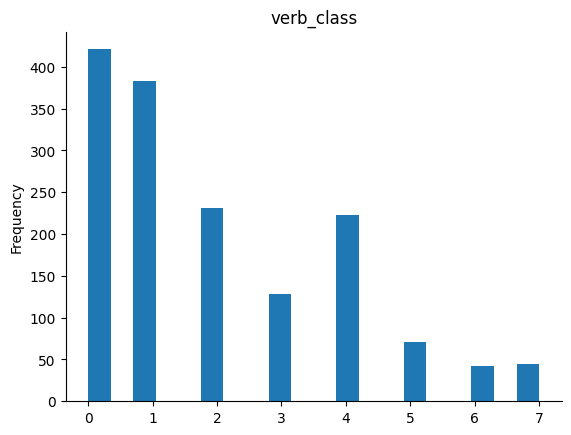

In [ ]:
from matplotlib import pyplot as plt
df['verb_class'].plot(kind='hist', bins=20, title='verb_class')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [18]:
merged_dataframe2

,uid,video_name,features_RGB,narration,start_timestamp,stop_timestamp,start_frame,stop_frame,verb,verb_class
0,12915,P08_01,"[[0.33484152, 0.42796582, 0.16918139, 0.274220...",open fridge,00:00:04.09,00:00:05.84,245,350,open,2
1,12916,P08_01,"[[0.017110756, 0.39786223, 0.06796272, 0.11424...",get milk,00:00:05.94,00:00:07.23,356,433,get,0
2,12917,P08_01,"[[0.2283897, 0.45467827, 0.20638657, 0.1419512...",close fridge,00:00:07.29,00:00:08.95,437,537,close,3
3,12918,P08_01,"[[0.10710664, 0.19385232, 0.28377664, 0.041461...",get moka,00:00:10.64,00:00:13.50,638,810,get,0
4,12919,P08_01,"[[0.13795894, 0.060674295, 0.18705763, 0.12086...",place water,00:00:15.72,00:00:21.14,943,1268,place,1
...,...,...,...,...,...,...,...,...,...,...
1538,15576,P08_28,"[[0.11722597, 0.2320831, 0.09952651, 0.1358126...",take bowl,00:00:21.40,00:00:22.79,1284,1367,take,0
1539,15577,P08_28,"[[0.2341425, 0.04489535, 0.21806838, 0.0748055...",open fridge,00:00:22.08,00:00:23.69,1324,1421,open,2
1540,15578,P08_28,"[[0.06847702, 0.30193064, 0.0061597317, 0.1264...",place bowl,00:00:23.04,00:00:25.13,1382,1507,place,1
1541,15579,P08_28,"[[0.10913118, 0.18064682, 0.20048876, 0.349944...",close fridge,00:00:24.67,00:00:26.17,1480,1570,close,3


**Trainer Run**

In [ ]:
%%bash

cd aml23-ego

python train_classifier.py \
dataset.shift=D1-D1 \
dataset.RGB.data_path=../ek_data/frames

2024-01-14 20:46:25 LOG INFO Running with parameters: 
  action: train
  name: test
  modality: ['RGB']
  total_batch: 128
  batch_size: 32
  gpus: None
  wandb_name: None
  resume_from: None
  logname: None
  models_dir: saved_models/test/Jan14_20-46-21
  train:
    num_iter: 5000
    lr_steps: 3000
    eval_freq: 50
    num_clips: 1
    dense_sampling:
      RGB: True
    num_frames_per_clip:
      RGB: 16
  test:
    num_clips: 5
    dense_sampling:
      RGB: True
    num_frames_per_clip:
      RGB: 16
  dataset:
    annotations_path: train_val
    shift: D1-D1
    workers: 4
    stride: 2
    resolution: 224
    RGB:
      data_path: ../ek_data/frames
      tmpl: img_{:010d}.jpg
      features_name: test_feat_kinetics
    Event:
      rgb4e: 6
  models:
    RGB:
      model: Classifier
      normalize: False
      kwargs:
      lr_steps: 3000
      lr: 0.01
      sgd_momentum: 0.9
      weight_decay: 1e-07
  experiment_dir: test/Jan14_20-46-21
  log_dir: Experiment_logs/test/Jan14